# Face detection using OpenCV

### Import resources and display image

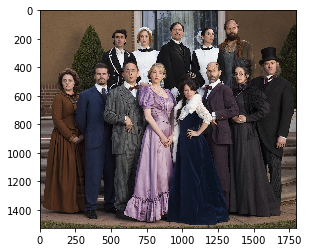

In [3]:
import os
os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')

# import required libraries for this section
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in the image
image = cv2.imread('data/images/multi_faces.jpg')

# Convert to RBG
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

To use a face detector, we'll first convert the image from color
to grayscale;
For face detection this is perfectly fine to do as there is plenty
non-color specific structure in the human face for our detector
to learn on.

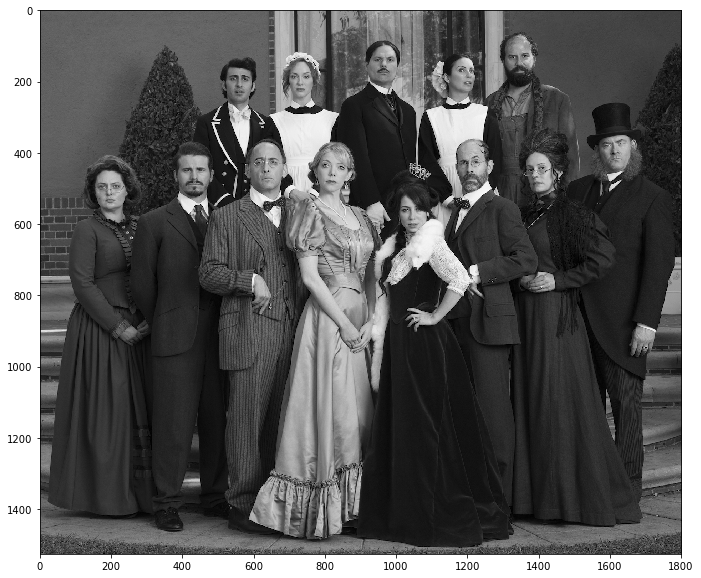

In [4]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 10))
plt.imshow(gray, cmap='gray')

Next we load in the fully trained architecture of the face detector, found in the
file detector_architectures/ haarcascade_frontalface_default.xml, and use it on our
image to find faces!

In [11]:
# Load in cascade classifier
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 4, 6)

In [12]:
# The output of the classifier is an array of detections;
# coordinates that define the dimensions of a bounding box around each face.
# Note that this always outputs a bounding box that is square in dimension;

# print out the detections found
print ('We found ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

We found 13 faces in this image
Their coordinates and lengths/widths are as follows
[[ 588  390   96   96]
 [1157  390   96   96]
 [ 773  404   96   96]
 [ 383  413   96   96]
 [1344  411   96   96]
 [1295   94   96   96]
 [ 917  103   96   96]
 [ 147  459   96   96]
 [ 996  526   96   96]
 [1146  132   96   96]
 [ 684  150   96   96]
 [ 510  156   96   96]
 [1565  339   96   96]]


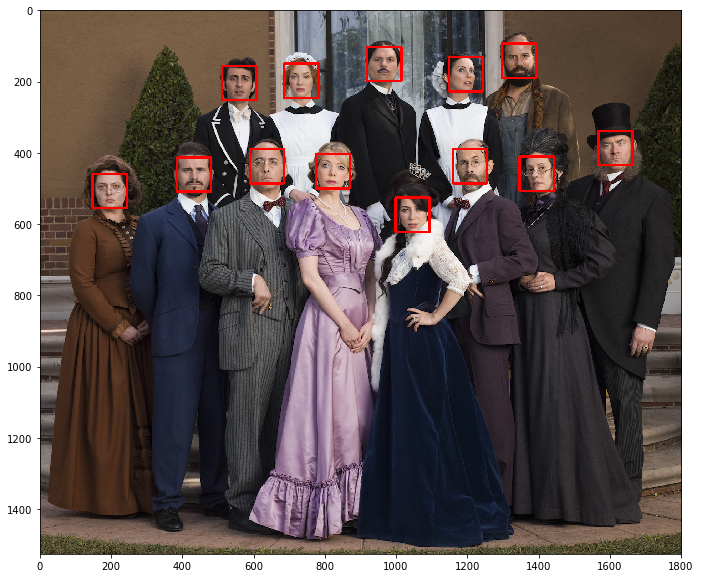

In [13]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.
    # Note: the fourth element (255,0,0) determines the color of the rectangle,
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)

# display the result
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)